

このソフトは内閣府の最新のワクチン詳細から、府県別のワクチン接種件数の推移をグラフとして示す。（2021／06／08）
以前は内閣府のndjsonファイルをパソコンに一旦セーブしていたが、このプログラムでは直接ウェブサイトから読み取り、手作業を省いている。
このため、ndjsonというモジュールを使っている。読み取ったデータのcountが文字変数なので、これをintegerに置き換えている。

途中で、県名コードおよび県名を入れる。

https://stackoverflow.com/questions/30088006/loading-a-file-with-more-than-one-line-of-json-into-pandas
Stack Overflowに以下の例示があった。これを使ったら,ndjsonでも読むことができたので、記録しておく。

From version 0.19.0 of Pandas you can use the lines parameter, like so:
import pandas as pd
data = pd.read_json('/path/to/file.json', lines=True)

In [1]:
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.transforms as transforms
import matplotlib.patheffects as patheffects

In [2]:
import pandas as pd

In [3]:
import ndjson
import requests
response = requests.get('https://vrs-data.cio.go.jp/vaccination/opendata/latest/prefecture.ndjson')
items = response.json(cls=ndjson.Decoder)

In [4]:
data_df = pd.DataFrame(items)

In [5]:
data_df.dtypes

date              object
prefecture        object
gender            object
age               object
medical_worker      bool
status             int64
count              int64
dtype: object

In [6]:
data_df['prefecture']=data_df['prefecture'].astype(int)

In [7]:
#data_df = pd.read_json('prefecture.ndjson', lines = True)
print(data_df.tail())


             date  prefecture gender  age  medical_worker  status  count
41917  2021-07-22          47      M  -64           False       2    134
41918  2021-07-22          47      M  65-           False       1    107
41919  2021-07-22          47      M  65-           False       2   1144
41920  2021-07-22          47      U  UNK           False       1      4
41921  2021-07-22          47      U  UNK           False       2      4


In [8]:
count_per_day = data_df.groupby('date')['count'].sum()
print(count_per_day.tail())

date
2021-07-18    1097036
2021-07-19     864904
2021-07-20     904261
2021-07-21     732862
2021-07-22     297746
Name: count, dtype: int64


In [9]:
#県名番号をインプットする
number_list= list(range(1, 48))

#def nr_input():
#    print ('県名番号をインプット：')
    
#    while True:
#        s = input() 
#        if not s:
#            break
#        number_list.append(s)

print (number_list)
prf_nr_list = number_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]


In [10]:
#県名リストの一覧表からグラフを希望する県名リストを作成する。
prf_list = ['北海道', '青森県', '岩手県', '宮城県', '秋田県',
            '山形県', '福島県', '茨城県', '栃木県', '群馬県',
            '埼玉県', '千葉県', '東京都', '神奈川県', '新潟県',
            '富山県', '石川県', '福井県', '山梨県', '長野県',
            '岐阜県', '静岡県', '愛知県', '三重県', '滋賀県',
            '京都府', '大阪府', '兵庫県', '奈良県', '和歌山県',
            '鳥取県', '島根県', '岡山県', '広島県', '山口県',
            '徳島県', '香川県', '愛媛県', '高知県', '福岡県',
            '佐賀県', '長崎県', '熊本県', '大分県', '宮崎県',
            '鹿児島県', '沖縄県']

def list_up(x):
    prf_nr = x-1
    prf_name = prf_list[prf_nr]
    return prf_name

prf_nr_list = []

for i in number_list:
    list_up( int(i))
    prf_name = list_up(int(i))
    print ('希望する県名：',int(i), prf_name)
    prf_nr_list.append(int(i))

print (prf_nr_list)
type(prf_nr_list[0])


希望する県名： 1 北海道
希望する県名： 2 青森県
希望する県名： 3 岩手県
希望する県名： 4 宮城県
希望する県名： 5 秋田県
希望する県名： 6 山形県
希望する県名： 7 福島県
希望する県名： 8 茨城県
希望する県名： 9 栃木県
希望する県名： 10 群馬県
希望する県名： 11 埼玉県
希望する県名： 12 千葉県
希望する県名： 13 東京都
希望する県名： 14 神奈川県
希望する県名： 15 新潟県
希望する県名： 16 富山県
希望する県名： 17 石川県
希望する県名： 18 福井県
希望する県名： 19 山梨県
希望する県名： 20 長野県
希望する県名： 21 岐阜県
希望する県名： 22 静岡県
希望する県名： 23 愛知県
希望する県名： 24 三重県
希望する県名： 25 滋賀県
希望する県名： 26 京都府
希望する県名： 27 大阪府
希望する県名： 28 兵庫県
希望する県名： 29 奈良県
希望する県名： 30 和歌山県
希望する県名： 31 鳥取県
希望する県名： 32 島根県
希望する県名： 33 岡山県
希望する県名： 34 広島県
希望する県名： 35 山口県
希望する県名： 36 徳島県
希望する県名： 37 香川県
希望する県名： 38 愛媛県
希望する県名： 39 高知県
希望する県名： 40 福岡県
希望する県名： 41 佐賀県
希望する県名： 42 長崎県
希望する県名： 43 熊本県
希望する県名： 44 大分県
希望する県名： 45 宮崎県
希望する県名： 46 鹿児島県
希望する県名： 47 沖縄県
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]


int

1 北海道


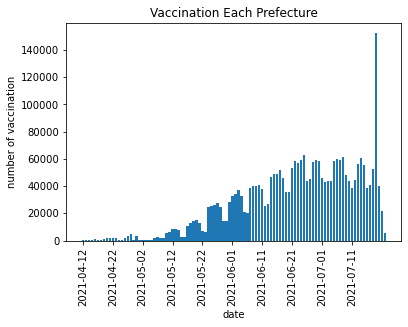

2 青森県


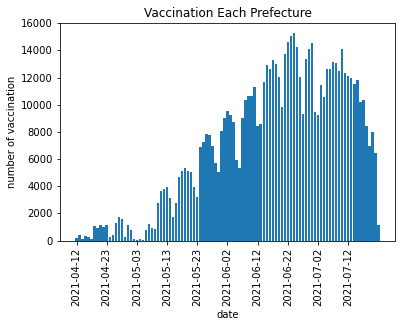

3 岩手県


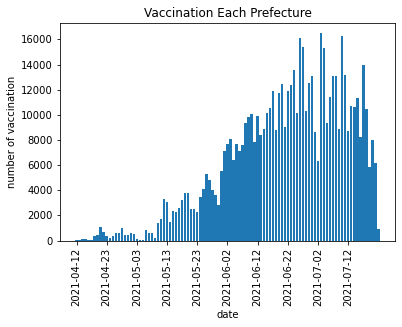

4 宮城県


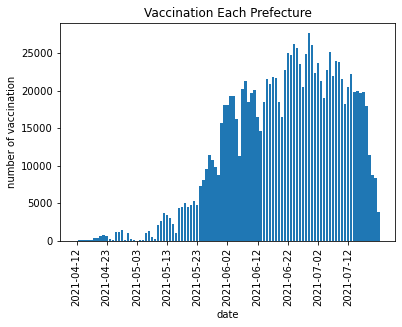

5 秋田県


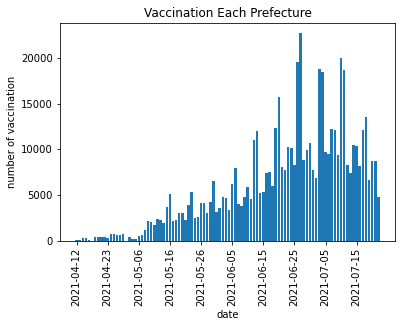

6 山形県


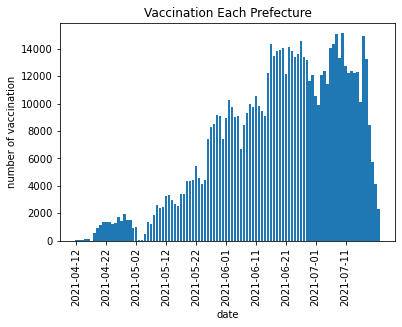

7 福島県


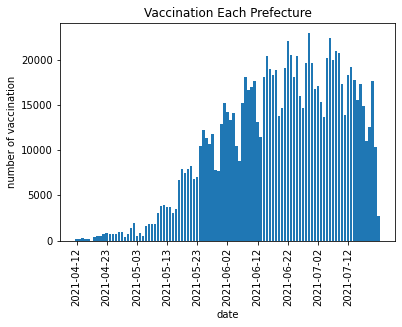

8 茨城県


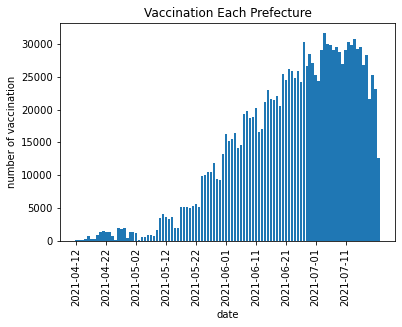

9 栃木県


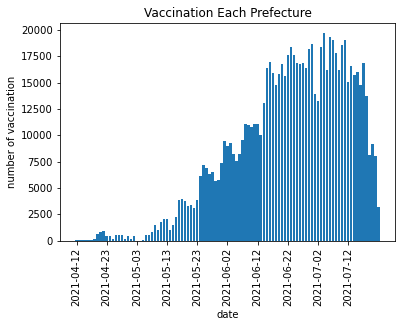

10 群馬県


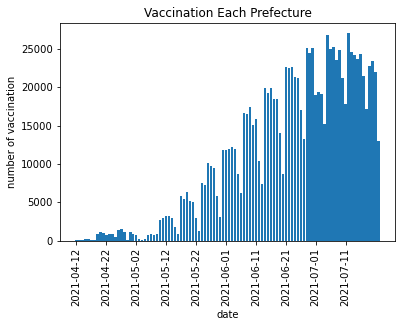

11 埼玉県


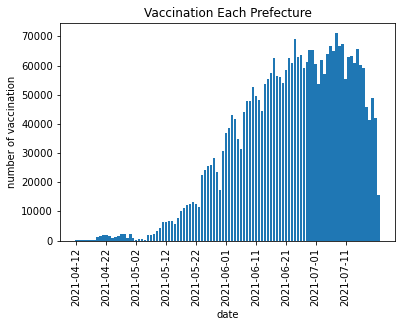

12 千葉県


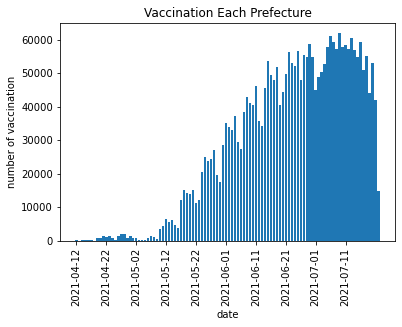

13 東京都


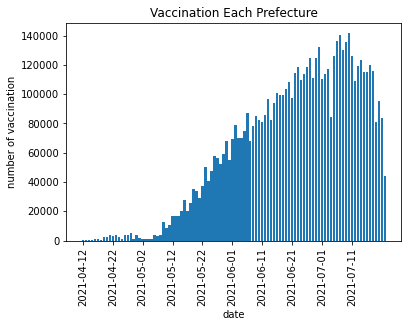

14 神奈川県


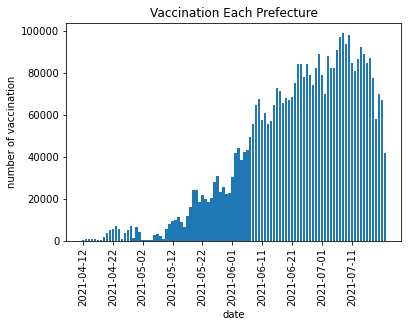

15 新潟県


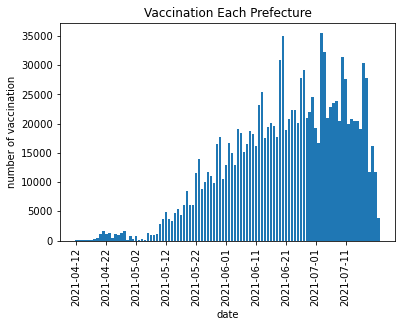

16 富山県


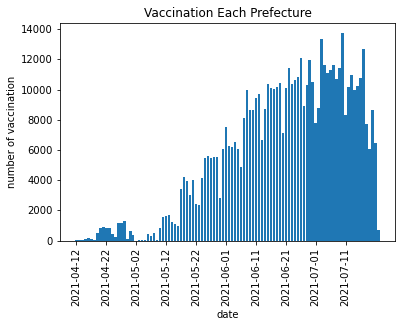

17 石川県


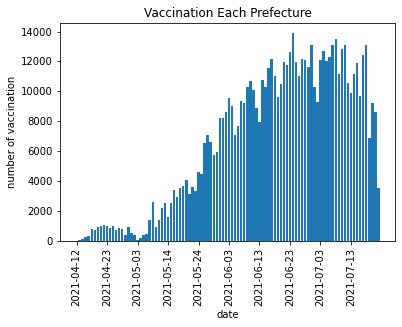

18 福井県


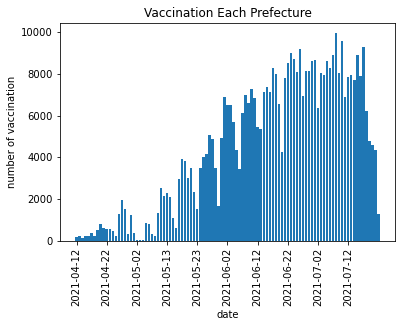

19 山梨県


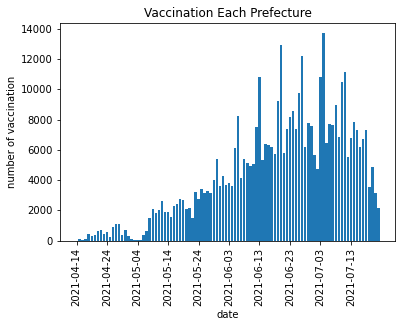

20 長野県


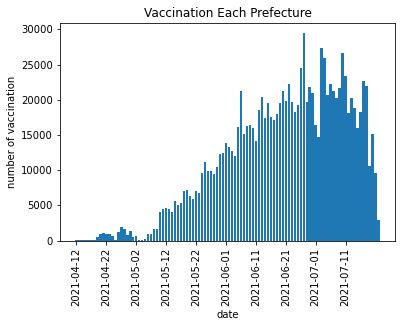

21 岐阜県


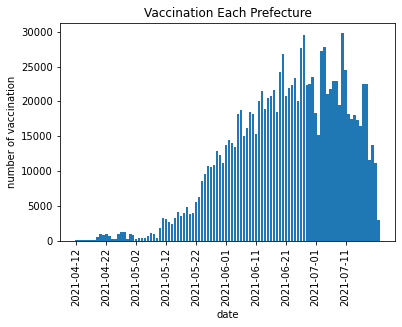

22 静岡県


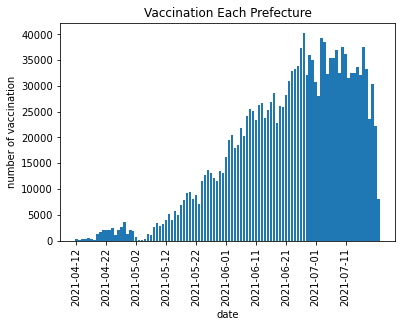

23 愛知県


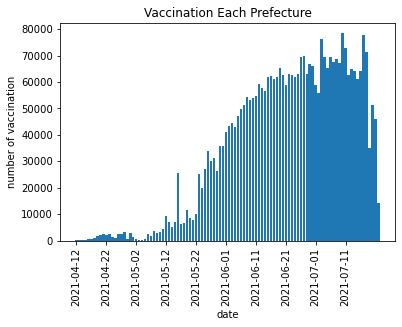

24 三重県


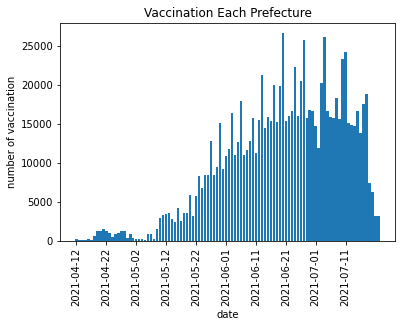

25 滋賀県


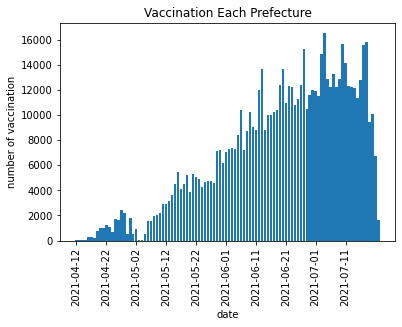

26 京都府


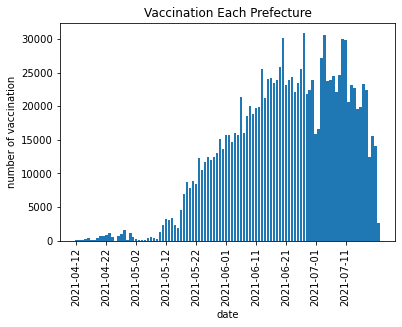

27 大阪府


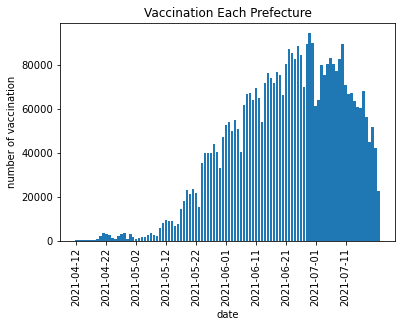

28 兵庫県


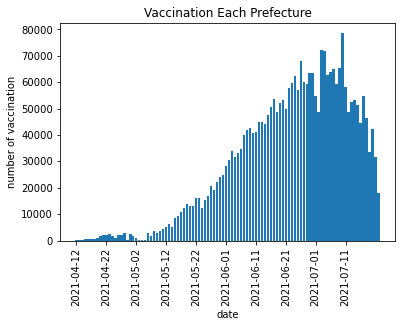

29 奈良県


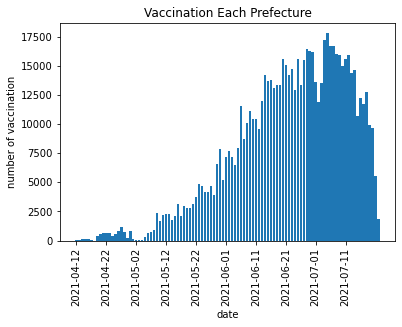

30 和歌山県


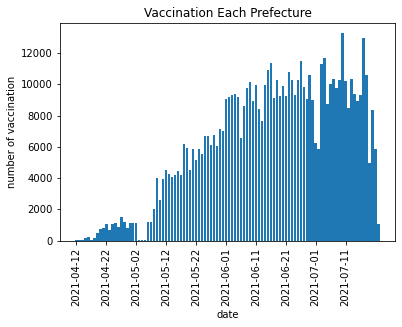

31 鳥取県


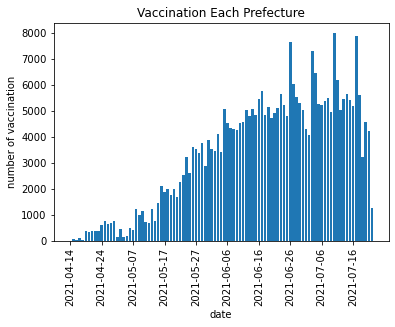

32 島根県


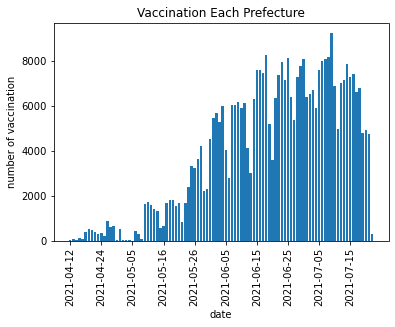

33 岡山県


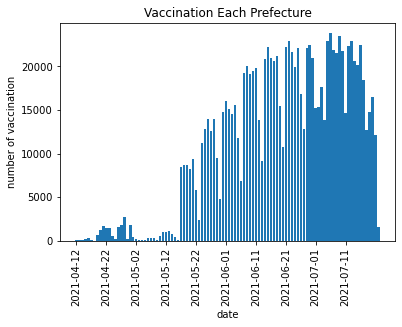

34 広島県


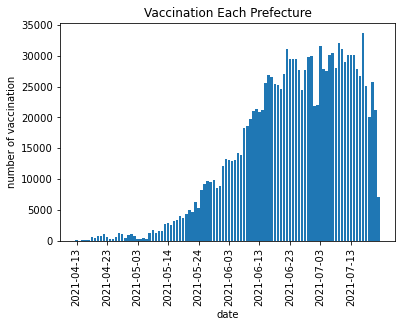

35 山口県


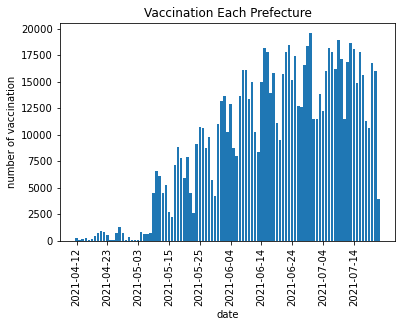

36 徳島県


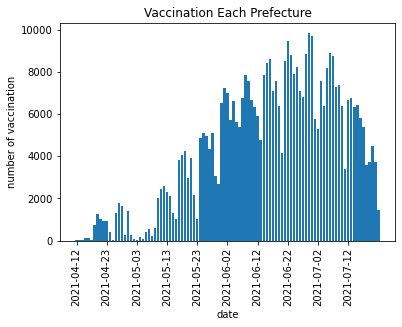

37 香川県


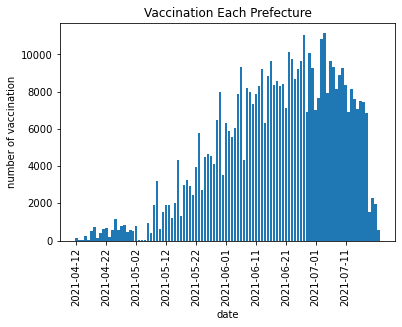

38 愛媛県


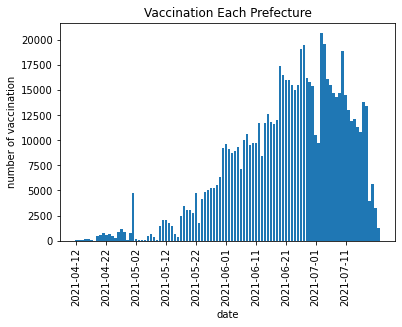

39 高知県


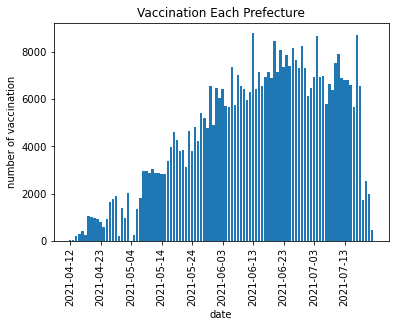

40 福岡県


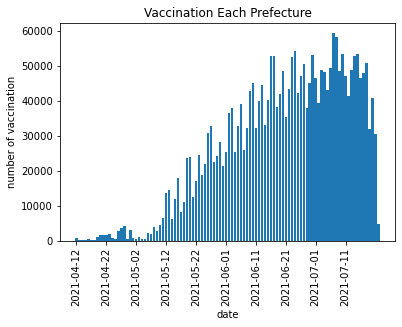

41 佐賀県


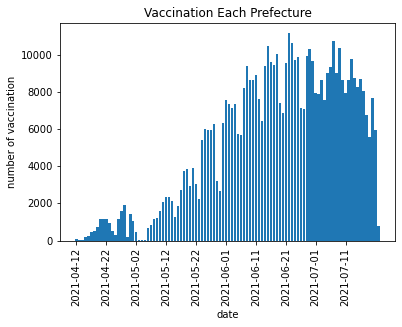

42 長崎県


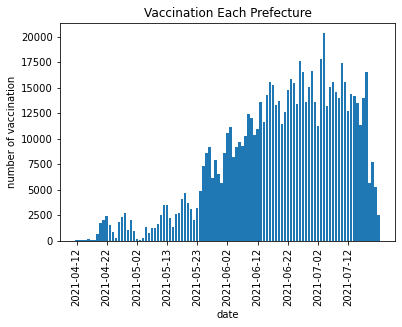

43 熊本県


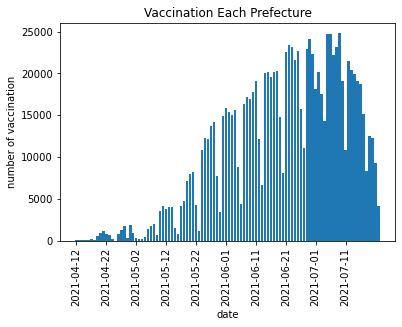

44 大分県


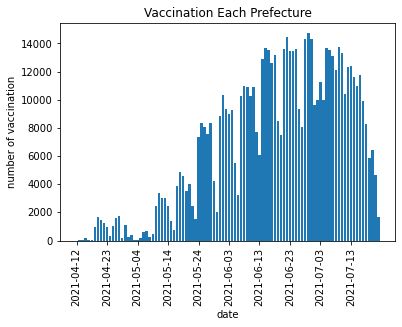

45 宮崎県


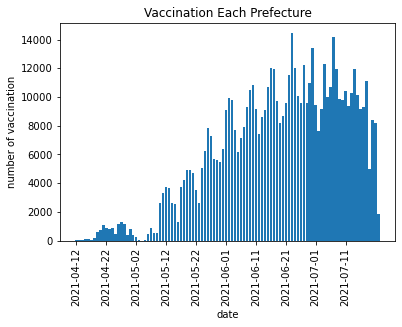

46 鹿児島県


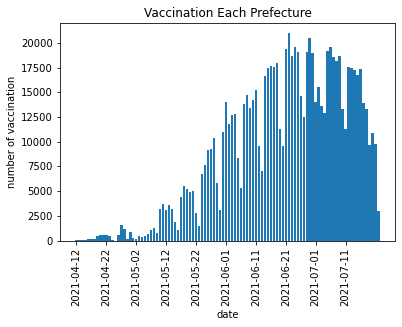

47 沖縄県


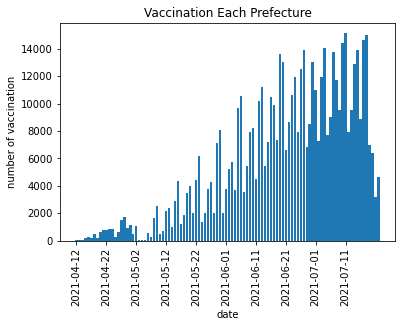

In [11]:
def each_pref (prefecture_nr):
    data_selected = data_df[(data_df['prefecture']== prefecture_nr) ]
    return data_selected

def graph_draw():
    fig, ax = plt.subplots()
    index = count_per_day.index
    p1 = ax.bar(index,count_per_day)

    plt.title('Vaccination Each Prefecture')
    ax.set_ylabel('number of vaccination')
    ax.set_xlabel('date')
    plt.xticks(rotation=90)
    ax.set_xticks(ax.get_xticks()[0:100:10])
    plt.show()

for i in prf_nr_list:
    prf_name = list_up(i)
    print (i, prf_name)
    data_selected = each_pref(i)
    count_per_day = data_selected.groupby('date')['count'].sum()
    graph_draw()
   



matplotlib.pyplot.bar(left, height, width=0.8, bottom=None, hold=None,
                      data=None, **kwargs)